# Demo Time: Iris Dataset
__About the data:__  
What it is: The _Iris_ dataset is a collection of data from three different species of iris:
* Vericolor
* Setosa
* Verginica
    
The petal/sepal lengths and widths were examined along with their respective class.  
The dataset consists of 50 records of each class totaling 150 recods.  
The objective is to build a classification algorithm that can accurately label each species based on its attributes.

__Process:__
1. Load dependencies
2. Data Understanding
3. Data Modeling
4. Accuracy

### 1. Load Dependencies

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from sklearn import metrics 

# A way to load a .csv file into a pandas dataframe
iris_data = pd.read_csv('iris_dataset.csv')
iris_data.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']

### 2. Data Understanding

In [31]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
"""
This iris dataset has explanatory (X) variables:
    - sepal_length: 
    - sepal_width
    - petal_length
    - petal_width
    - class

The objective is to create a modelthat can take the dimensions of the sepal and petal 
to predict a class for the flower:
    - Versicolor
    - Setosa
    - Verginica
"""

![flower_anatomy.jpg](flower_anatomy.jpg)

In [12]:
# Dimension of the data: 150 rows, even balanced targets
iris_data['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

In [25]:
"""
Correlation coefficient:
    There is strong correlation between petal_length and petal_width
    There is a very weak correlation between septal_length and sepal_width
    
If petal_length increases, then it can be said petal_width will also increase with great confidence (Strong Correlation)
If septal_length increases, sepal_width might not necessarily increase (Weak Correlation)
"""

iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


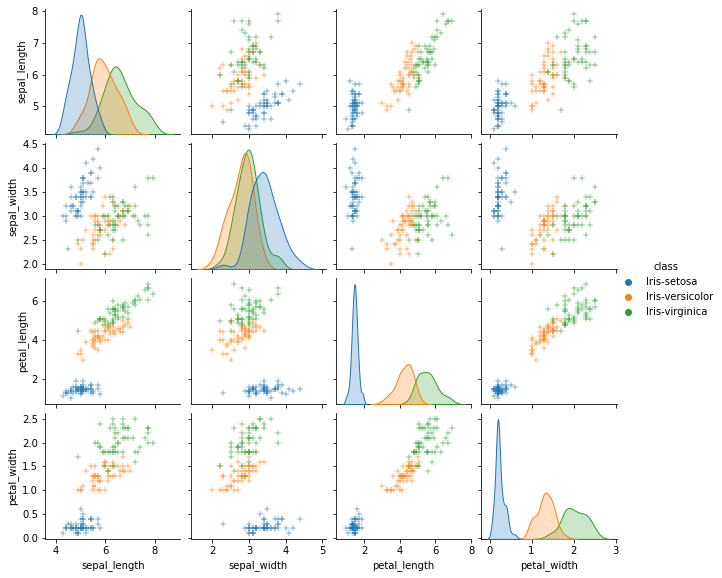

In [21]:
"""
Creating a pairplot with seaborn to identify correlation
The more linear the plot the higher the correlation
Correlation can be positive or negative 
"""
plot = sns.pairplot(iris_data, hue='class', markers='+')
plot.fig.set_size_inches(10,8)
plt.show()

### 3. Data Modeling

##### For Visual Purpose

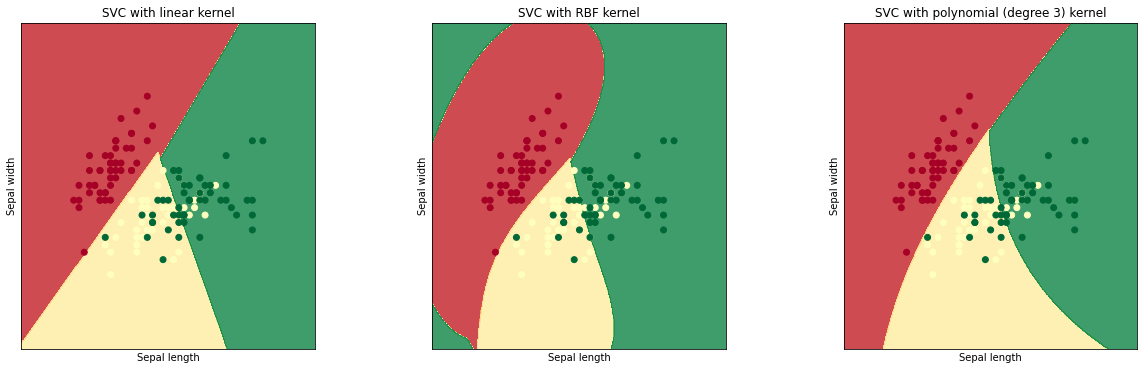

In [127]:
from sklearn import svm, datasets

# Import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=.8, C=1).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=1).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),
                     np.arange(y_min, y_max, .01))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

plt.figure(figsize=(20, 6))
for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(1,3, i + 1)

    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### Let's get back to modeling!

In [131]:
from sklearn.model_selection import train_test_split

"""
Imortant: Make sure you remove the target from your X variables
In this case we are going to do a 70|30 Train|Test split
"""
X = iris_data.drop(['class'], axis=1)
y = iris_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [143]:
# Creating our SVM classifier
clf_SVC = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
clf_SVC.fit(X_train,y_train)

SVC(C=100.0, gamma='auto', random_state=0, verbose=0)

### 4. Accuracy

In [144]:
# Checking the model accuracy
acc_svm = metrics.accuracy_score(svc_pred,y_test)
print('The accuracy of the SVM Test is:',round(acc_svm,2))

The accuracy of the SVM Test is: 0.98


In [155]:
# Let's see which ones we got wrong!
final_results = pd.DataFrame(y_test)
final_results['predicted_class'] = clf_SVC.predict(X_test)
final_results[final_results['class'] != final_results['predicted_class']]

,class,predicted_class
77,Iris-versicolor,Iris-virginica


In [158]:
# Feeding the model values: Iris
new_input = [[5.3, 3.5, 1.4, 0.5]]
clf_SVC.predict(new_input)[0]

'Iris-setosa'